In [56]:
from problem1 import derivative_forward,derivative_centered
from problem2 import num_exp
import numpy as np
import matplotlib.pyplot as plt

# 1.7 
## (a)

In [57]:
num_pts = 20
x = 1
f = np.sin
f_derivative = np.cos

In [58]:
h_list = [0.5**(i+1) for i in range(num_pts)]
# error = np.zeros(shape=(num_pts,))

In [59]:
error = [np.abs(derivative_forward(f,x,h)-f_derivative(x)) for h in h_list]
error

[0.22825430227582388,
 0.11024776767738098,
 0.05392943153855034,
 0.026639100121346626,
 0.013234849721358355,
 0.006595843010424485,
 0.003292475538417161,
 0.0016448699861526528,
 0.0008220922622554916,
 0.00041096035040899537,
 0.0002054587177595657,
 0.00010272399295407908,
 5.136065483801744e-05,
 2.5679992363247806e-05,
 1.2839911691653327e-05,
 6.419934110990511e-06,
 3.2099562345955235e-06,
 1.60496729639803e-06,
 8.024873792145115e-07,
 4.012037648770672e-07]

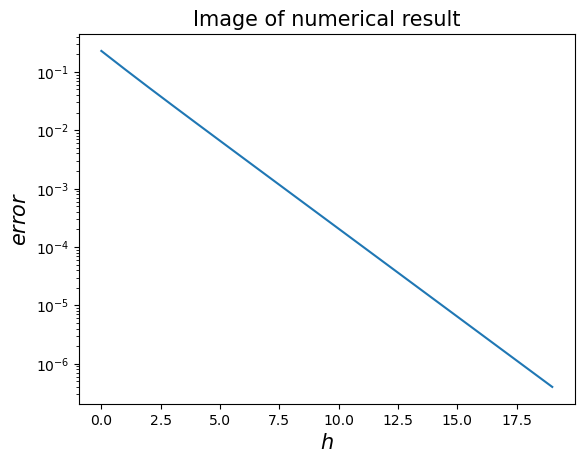

In [60]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(range(num_pts),error)
plt.xlabel(r"$h$", fontsize=15)
plt.ylabel(r"$error$", fontsize=15)

plt.title("Image of numerical result", fontsize=15)
plt.savefig("./pro1a.png")
plt.show()

## (b)

In [61]:
error_c = [np.abs(derivative_centered(f,x,h)-f_derivative(x)) for h in h_list]
error_c

[0.4958365901315631,
 0.5290811314608685,
 0.5374904290364051,
 0.5395989246339092,
 0.5401264347989554,
 0.5402583364906648,
 0.5402913134231384,
 0.5402995577505991,
 0.5403016188383689,
 0.5403021341106027,
 0.5403022629287038,
 0.5403022951334564,
 0.5403023031847582,
 0.5403023051965605,
 0.5403023057004206,
 0.5403023058241119,
 0.5403023058677676,
 0.5403023058823195,
 0.5403023058532157,
 0.5403023059114234]

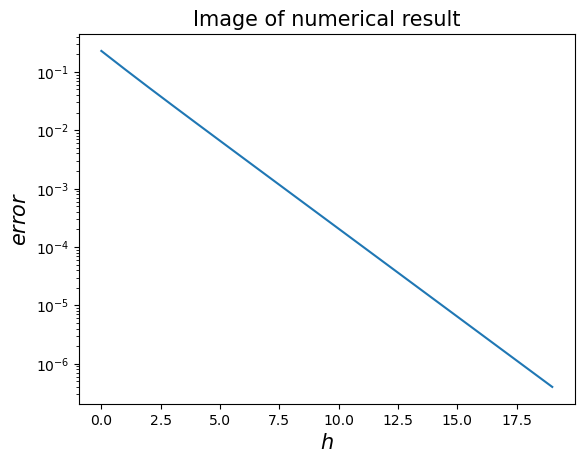

In [62]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(range(num_pts),error)
plt.xlabel(r"$h$", fontsize=15)
plt.ylabel(r"$error$", fontsize=15)

plt.title("Image of numerical result", fontsize=15)
plt.savefig("./pro1b.png")
plt.show()

# 1.9
## (a)

In [63]:
num_exp(1,100)

2.7182818284590455

## (b)

In [64]:
x_list = [-20,-15,-10,-5,-1,1,5,10,15,20]
def print_stop_pt(x):
    for i in range(10000):
        error = num_exp(x,i+1)-num_exp(x,i)
        if error == 0:
            print("When x = %d ,stopping in n=" % x,i)
            break
for x in x_list:
    print_stop_pt(x)

When x = -20 ,stopping in n= 79
When x = -15 ,stopping in n= 65
When x = -10 ,stopping in n= 50
When x = -5 ,stopping in n= 34
When x = -1 ,stopping in n= 18
When x = 1 ,stopping in n= 17
When x = 5 ,stopping in n= 33
When x = 10 ,stopping in n= 45
When x = 15 ,stopping in n= 57
When x = 20 ,stopping in n= 67


## (c)

In [66]:
for x in x_list:
    result = num_exp(x,100)
    error = np.exp(x) - result
    print("When x = %d ,result is %f, error with built-in exp(%d) is %f" % (x,result,x,error))

When x = -20 ,result is 1.050000, error with built-in exp(-20) is -1.050000
When x = -15 ,result is 1.066667, error with built-in exp(-15) is -1.066666
When x = -10 ,result is 1.099995, error with built-in exp(-10) is -1.099950
When x = -5 ,result is 1.198652, error with built-in exp(-5) is -1.191914
When x = -1 ,result is 1.632121, error with built-in exp(-1) is -1.264241
When x = 1 ,result is 2.718282, error with built-in exp(1) is -0.000000
When x = 5 ,result is 30.482632, error with built-in exp(5) is 117.930527
When x = 10 ,result is 2203.546579, error with built-in exp(10) is 19822.919215
When x = 15 ,result is 217935.424831, error with built-in exp(15) is 3051081.947641
When x = 20 ,result is 24258260.720490, error with built-in exp(20) is 460906934.689301
